# GDP Percentage Based On Total Services

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
</ul>

<a id='intro'></a>

<font color=#303F9F>This part of the project for "Investigating Country GDP and Education" will focus on the total percentage of "Services" for each year 1960-2017. Choosing to investigage the top GDP/Capita countries above the mean.</font>
<p>
<li><font color=green>Luxembourg</li></font>
<li><font color=blue>Norway</li></font>
<li><font color=red>Denmark</li></font>
<li><font color=gold>Sweden</li></font>
<li><font color=#81D4FA>Australia</li></font>

<a id='wrangling'></a>
# Lets Do Some Wrangling and Oganizing.
<font color=#303F9F>We start by importing all of our necessary libraries and the data we want to analyze "services_percent_of_gdp.csv".</font>
<p>
<font color=#303F9F><li>Pandas to help us wrangle and organize our data</li></font>
<font color=#303F9F><li>Matplotlib to create beautiful visualizations</li></font>
<font color=#303F9F><li>Seaborn for visualization styling</li></font>
<font color=#303F9F><li>Numpy to help with scientific computing</li></font>


In [13]:
#Import Packages and read the data
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Set Chartting Style
sns.set(style="whitegrid")

#Setting figure size for visuals
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10
fig_size[1] = 6

#GDP Percent Services by county & year 1970-2017 
gdp_services = pd.read_csv('services_percent_of_gdp.csv')

In [14]:
#Viewing GDP Services Data
gdp_services.head()

,country,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,45.8,45.5,49.1,50.0,51.5,53.0,53.2,53.4,53.0,NaN
1,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,44.7,45.3,44.0,44.3,45.0,44.6,45.8,46.3,46.7,47.3
2,Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.6,45.1,44.1
3,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,76.3,77.5,78.1,78.0,78.5,79.3,79.5,80.0,79.2,NaN
4,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<font color=#303F9F>You’ll notice the use of “.head()” quite extensively this is just for saving space.</font>

In [15]:
#Investigate the data 171 Row & 59 Columns
gdp_services.shape

(171, 59)

In [16]:
#Investigate the data types we don't want an INT or Float to be a String.
gdp_services.dtypes.head()

country     object
1960       float64
1961       float64
1962       float64
1963       float64
dtype: object

In [17]:
#Investigate null records
gdp_services.isnull().sum().head()

country      0
1960       137
1961       136
1962       136
1963       135
dtype: int64

In [18]:
#Investigate duplicate records
gdp_services.duplicated().sum()

0

In [19]:
#Investigate number of unique values in each column
gdp_services.nunique().head()

country    171
1960        33
1961        35
1962        35
1963        35
dtype: int64

In [20]:
#Generate descriptive statistics that summarize the central tendency, dispersion and shape of a dataset’s distribution.
gdp_services.describe()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
count,34.000000,35.000000,35.000000,36.000000,38.000000,48.000000,51.000000,52.000000,53.000000,53.000000,...,163.000000,163.000000,164.000000,164.000000,164.000000,166.000000,166.000000,165.000000,162.000000,137.000000
mean,42.860294,44.179714,44.391143,43.339167,45.007105,41.858333,42.613725,41.817308,41.716981,41.798113,...,52.136564,54.194663,53.257683,52.664268,53.059146,53.674036,54.012831,55.162000,55.212469,54.338686
std,16.876475,18.536125,17.606449,17.786467,18.665464,11.647351,11.030558,10.243367,10.431733,10.562024,...,13.611021,13.093657,13.177492,13.562543,13.637254,13.256491,12.798664,12.021685,11.574401,10.841459
min,6.550000,5.490000,4.790000,7.310000,7.070000,10.900000,18.400000,18.800000,20.900000,21.200000,...,9.030000,9.530000,7.160000,6.940000,6.400000,5.590000,5.230000,6.530000,9.520000,22.500000
25%,35.725000,34.600000,35.550000,33.475000,34.075000,35.450000,36.150000,36.000000,36.300000,35.800000,...,43.900000,46.050000,45.175000,45.000000,45.600000,46.700000,47.125000,47.900000,48.025000,46.900000
50%,39.850000,39.700000,40.100000,40.150000,41.150000,42.100000,40.700000,41.100000,41.700000,41.400000,...,53.000000,55.000000,53.550000,53.050000,54.000000,54.450000,54.350000,55.800000,55.450000,55.700000
75%,46.475000,47.350000,48.150000,47.700000,48.525000,47.175000,47.800000,46.425000,49.000000,49.800000,...,61.850000,62.800000,61.900000,62.150000,63.350000,63.375000,63.625000,62.300000,62.850000,61.300000
max,98.600000,98.600000,98.600000,98.600000,98.600000,73.000000,71.100000,69.000000,68.100000,67.300000,...,81.200000,93.700000,81.100000,79.800000,78.500000,79.300000,79.500000,81.600000,79.200000,78.900000


<font color=#303F9F>We run into a problem with year being in the header. This makes it difficult to work with the data set. Luckily there is a function called “MELT” in the pandas library that will place all dates within a new column.</font>

In [21]:
#using padas melt function to organize and relable the data. The year being in the header to the year being a column.
gdp_services_cleaner = pd.melt(gdp_services, id_vars=['country'],var_name='year', value_name='gdp')
gdp_services_cleaner.head()

,country,year,gdp
0,Afghanistan,1960,NaN
1,Albania,1960,NaN
2,Algeria,1960,NaN
3,Andorra,1960,NaN
4,Angola,1960,NaN


<a id='eda'></a>

<font color=#303F9F>Running queries for our desired countries we are able to create a line chart visualization. </font>
<p>
<li><font color=green>Luxembourg</li></font>
<li><font color=blue>Norway</li></font>
<li><font color=red>Denmark</li></font>
<li><font color=gold>Sweden</li></font>
<li><font color=#81D4FA>Australia</li></font>

In [22]:
#Query the desired countries Python 3.7/pandas updated
#lu = gdp_services_cleaner.query('country.str.contains("Luxembourg")')
#no = gdp_services_cleaner.query('country.str.contains("Norway")')
#dk = gdp_services_cleaner.query('country.str.contains("Denmark")')
#se = gdp_services_cleaner.query('country.str.contains("Sweden")')
#au = gdp_services_cleaner.query('country.str.contains("Australia")')

#Query the desired countries
lu = gdp_services_cleaner[gdp_services_cleaner['country'].str.contains("Luxembourg")]
no = gdp_services_cleaner[gdp_services_cleaner['country'].str.contains("Norway")]
dk = gdp_services_cleaner[gdp_services_cleaner['country'].str.contains("Denmark")]
se = gdp_services_cleaner[gdp_services_cleaner['country'].str.contains("Sweden")]
au = gdp_services_cleaner[gdp_services_cleaner['country'].str.contains("Australia")]

<font color=#303F9F>Create A Line Chart </font>

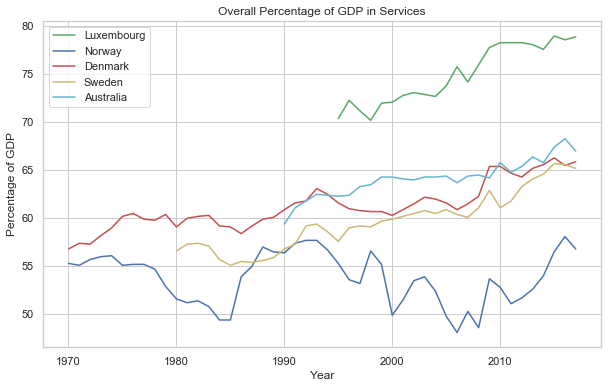

In [23]:
#Line Chart For GDP % Services 1970-2017
def gdp_services_line_chart():
    
    sns.set(style="whitegrid")
    year = list(range(1960, 2018))
    lu_gdp = lu['gdp']
    no_gdp = no['gdp']
    dk_gdp = dk['gdp']
    se_gdp = se['gdp']
    au_gdp = au['gdp']

    plt.plot(year, lu_gdp, color='g', label='Luxembourg')
    plt.plot(year, no_gdp, color='b', label='Norway')
    plt.plot(year, dk_gdp, color='r', label='Denmark')
    plt.plot(year, se_gdp, color='y', label='Sweden')
    plt.plot(year, au_gdp, color='c', label='Australia')

    plt.legend(loc='upper left')
    plt.xlabel('Year')
    plt.ylabel('Percentage of GDP')
    plt.title('Overall Percentage of GDP in Services')
    return plt.show()

gdp_services_line_chart()

<font color=#303F9F>Lets take a look at Norway based on a box plot. The reason for doing this is because we have extensive data. It is also interesting that from 1970 to 2017 Norway hasn't increased as a service providing nation. All other nations have been on the Increase.</font>

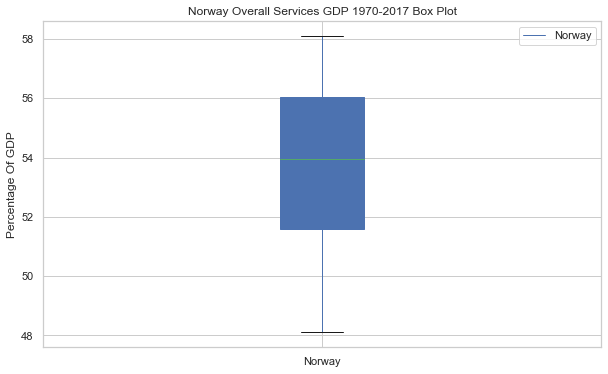

In [25]:
def gdp_percent_services_norway_box():
#lu.plot.box(x= 'year', y= 'gdp', title= 'Luxembourg Services GDP Box Plot');
    no.plot.box(x= 'year', y= 'gdp', title= 'Norway Overall Services GDP 1970-2017 Box Plot',patch_artist=True, label='Norway');
    plt.legend(no.country.iloc[0:1])
    plt.ylabel('Percentage Of GDP')
    return plt.show()
    #dk.plot.box(x= 'year', y= 'gdp', title= 'Denmark Services GDP Box Plot');
#se.plot.box(x= 'year', y= 'gdp', title= 'Sweden Services GDP Box Plot');
#au.plot.box(x= 'year', y= 'gdp', title= 'Australia Services GDP Box Plot');
gdp_percent_services_norway_box();